In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('Features.pk', 'rb') as handle:
    data = pickle.load(handle)

In [3]:
from sklearn import preprocessing
cols = data.columns
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)
data.columns = cols

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(metrics.classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {metrics.accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {metrics.confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(metrics.classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {metrics.accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {metrics.confusion_matrix(y_test, pred)}\n")

In [6]:
X = data.drop(['IcNaOk'], axis=1)
y = data['IcNaOk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None)

In [7]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

In [8]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

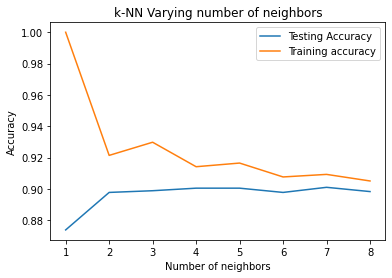

In [9]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
#rule of thumb sqrt(# features)
np.sqrt(X.shape[1])

6.557438524302

In [29]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_res,y_train_res)
knn.score(X_test,y_test)

0.833605220228385

<AxesSubplot:>

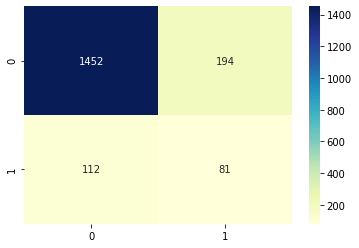

In [30]:
import sklearn.metrics as metrics
y_pred = knn.predict(X_test)
cm_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [34]:
print_score(knn, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.998958     1.000000  0.999478     0.999479      0.999479
recall        1.000000     0.998957  0.999478     0.999478      0.999478
f1-score      0.999479     0.999478  0.999478     0.999478      0.999478
support    3835.000000  3835.000000  0.999478  7670.000000   7670.000000
_______________________________________________
Confusion Matrix: 
 [[3835    0]
 [   4 3831]]

Test Result:
Accuracy Score: 83.36%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.928389    0.294545  0.833605     0.611467      0.861868
recall        0.882139    0.419689  0.833605     0.650914      0.833605
f1-score      0.904673    0.346154  0.833605     0.625413      0.846057
support    1646.000000  193.000000  

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_res,y_train_res)
print(knn_cv.best_score_)
print(knn_cv.best_params_)

0.9305084745762713
{'n_neighbors': 2}
